In [97]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv(r"D:\Users\sandilya_garimella\Documents\Sandilya\DataSets\Automobile_data_cont.csv")

In [99]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [100]:
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [101]:
df = df.replace('?', np.NaN)

In [102]:
df.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

##### KNN Imputer

In [103]:
imputer = KNNImputer(n_neighbors=2)
df_imp = imputer.fit_transform(df)
df_imp = pd.DataFrame(df_imp)
df_imp.columns = df.columns

In [104]:
df_imp.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,118.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,179.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,179.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [105]:
df_imp.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

##### MICE Imputer

In [106]:
imp_mean = IterativeImputer(random_state=0)
df_mice = imp_mean.fit_transform(df)
df_mice = pd.DataFrame(df_mice)
df_mice.columns = df.columns

In [107]:
df_mice.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,165.077913,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,168.011578,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,136.683116,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.000000,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.000000,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [108]:
df_mice.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [109]:
df_mice.shape

(205, 16)

In [110]:
df_mice.columns


Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [111]:
X = df_mice.drop(["price"],axis=1)
y = df_mice["price"]

In [113]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

### BEST SUBSET SELECTION

In [114]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    return best_model

In [119]:
getBest(7)

Processed 6435 models on 7 predictors in 19.043323278427124 seconds.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  # Remove the CWD from sys.path while we load stuff.


model    <statsmodels.regression.linear_model.Regressio...
RSS                                            2.09089e+09
Name: 6402, dtype: object

In [116]:
models_best = pd.DataFrame(columns=["RSS", "model"])

for i in range(1,8):
    models_best.loc[i] = getBest(i)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  # Remove the CWD from sys.path while we load stuff.


Processed 15 models on 1 predictors in 0.06454873085021973 seconds.
Processed 105 models on 2 predictors in 0.33732151985168457 seconds.
Processed 455 models on 3 predictors in 1.4736711978912354 seconds.
Processed 1365 models on 4 predictors in 4.210983753204346 seconds.
Processed 3003 models on 5 predictors in 8.745975732803345 seconds.
Processed 5005 models on 6 predictors in 15.454315423965454 seconds.
Processed 6435 models on 7 predictors in 18.718596935272217 seconds.


In [78]:
models_best

,RSS,model
1,4.376496e+09,<statsmodels.regression.linear_model.Regressio...
2,2.752351e+09,<statsmodels.regression.linear_model.Regressio...
3,2.551614e+09,<statsmodels.regression.linear_model.Regressio...
4,2.382043e+09,<statsmodels.regression.linear_model.Regressio...
5,2.161476e+09,<statsmodels.regression.linear_model.Regressio...
6,2.129507e+09,<statsmodels.regression.linear_model.Regressio...
7,2.090894e+09,<statsmodels.regression.linear_model.Regressio...


In [121]:
print(models_best.loc[7, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              635.7
Date:                Mon, 18 Jan 2021   Prob (F-statistic):                   5.64e-132
Time:                        20:25:34   Log-Likelihood:                         -1945.0
No. Observations:                 205   AIC:                                      3904.
Df Residuals:                     198   BIC:                                      3927.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [140]:
models_best.loc[7, "model"].rsquared

0.957399997219563

In [123]:
models_best.apply(lambda row: row[1].rsquared, axis=1)

1    0.910833
2    0.943923
3    0.948013
4    0.951468
5    0.955962
6    0.956613
7    0.957400
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series

Text(0, 0.5, 'BIC')

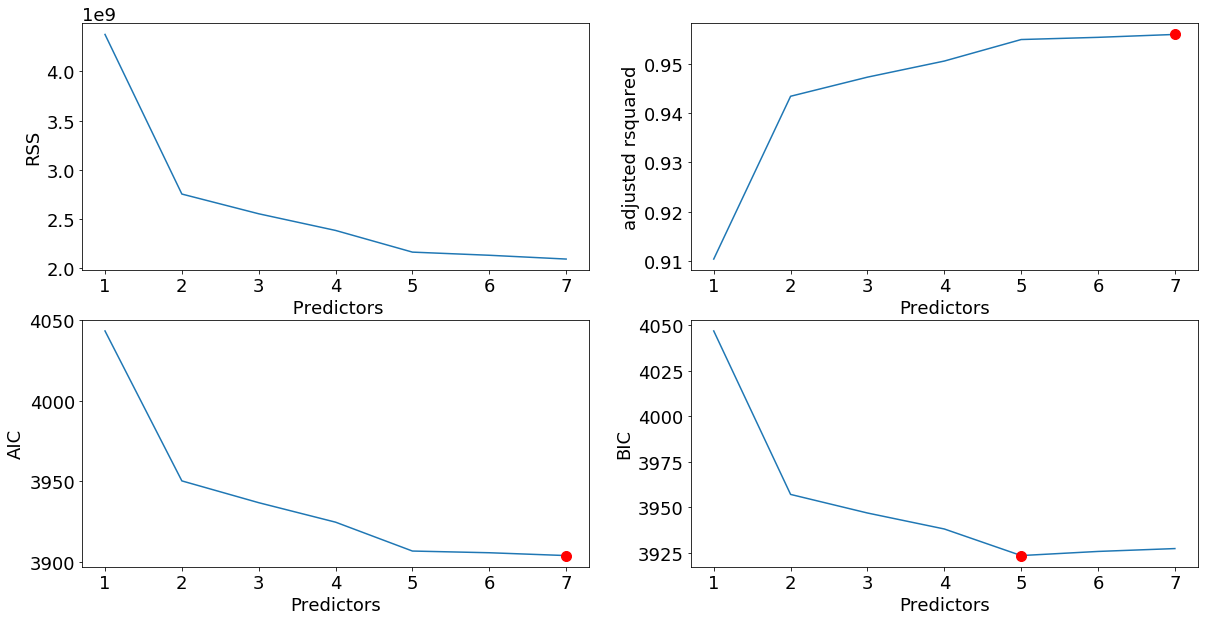

In [143]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(2, 2, 1)


plt.plot(models_best["RSS"])
plt.xlabel(' Predictors')
plt.ylabel('RSS')



rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('Predictors')
plt.ylabel('adjusted rsquared')


aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('Predictors')
plt.ylabel('BIC')

### FORWARD STEP-WISE SELECTION 

In [127]:
def forward(predictors):

   
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    
    return best_model


In [129]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  from ipykernel import kernelapp as app


Processed  15 models on 1 predictors in 0.08804893493652344 seconds.
Processed  14 models on 2 predictors in 0.08608341217041016 seconds.
Processed  13 models on 3 predictors in 0.05110502243041992 seconds.
Processed  12 models on 4 predictors in 0.04402041435241699 seconds.
Processed  11 models on 5 predictors in 0.06108903884887695 seconds.
Processed  10 models on 6 predictors in 0.06761455535888672 seconds.
Processed  9 models on 7 predictors in 0.05099773406982422 seconds.
Processed  8 models on 8 predictors in 0.03608584403991699 seconds.
Processed  7 models on 9 predictors in 0.032981157302856445 seconds.
Processed  6 models on 10 predictors in 0.03794407844543457 seconds.
Processed  5 models on 11 predictors in 0.01909613609313965 seconds.
Processed  4 models on 12 predictors in 0.014003992080688477 seconds.
Processed  3 models on 13 predictors in 0.011003255844116211 seconds.
Processed  2 models on 14 predictors in 0.009000301361083984 seconds.
Processed  1 models on 15 predict

In [130]:
models_fwd

,RSS,model
1,4.376496e+09,<statsmodels.regression.linear_model.Regressio...
2,2.752351e+09,<statsmodels.regression.linear_model.Regressio...
3,2.551614e+09,<statsmodels.regression.linear_model.Regressio...
4,2.382559e+09,<statsmodels.regression.linear_model.Regressio...
5,2.257811e+09,<statsmodels.regression.linear_model.Regressio...
6,2.129507e+09,<statsmodels.regression.linear_model.Regressio...
7,2.105292e+09,<statsmodels.regression.linear_model.Regressio...
8,2.046993e+09,<statsmodels.regression.linear_model.Regressio...
9,2.031202e+09,<statsmodels.regression.linear_model.Regressio...
10,2.013373e+09,<statsmodels.regression.linear_model.Regressio...


### BACKWARD STEP-WISE SELECTION

In [131]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [133]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

print("Total elapsed time:", (toc-tic), "seconds.")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if sys.path[0] == '':


Processed  15 models on 14 predictors in 0.08110308647155762 seconds.
Processed  14 models on 13 predictors in 0.06408977508544922 seconds.
Processed  13 models on 12 predictors in 0.04400491714477539 seconds.
Processed  12 models on 11 predictors in 0.0451509952545166 seconds.
Processed  11 models on 10 predictors in 0.04100966453552246 seconds.
Processed  10 models on 9 predictors in 0.07908892631530762 seconds.
Processed  9 models on 8 predictors in 0.039008378982543945 seconds.
Processed  8 models on 7 predictors in 0.03506946563720703 seconds.
Processed  7 models on 6 predictors in 0.02300715446472168 seconds.
Processed  6 models on 5 predictors in 0.01900339126586914 seconds.
Processed  5 models on 4 predictors in 0.015999317169189453 seconds.
Processed  4 models on 3 predictors in 0.014003276824951172 seconds.
Processed  3 models on 2 predictors in 0.010999679565429688 seconds.
Processed  2 models on 1 predictors in 0.008548498153686523 seconds.
Total elapsed time: 0.63263297080

In [134]:
#Best Subset selection
print(models_best.loc[7, "model"].params)

curb-weight             2.527429
engine-size           135.509066
bore                -2150.591990
stroke              -3680.670639
compression-ratio     339.804596
peak-rpm                2.218570
city-mpg             -241.433405
dtype: float64


In [135]:
#forward selection
print(models_fwd.loc[7, "model"].params)

engine-size           134.688057
city-mpg             -258.085771
compression-ratio     434.645912
horsepower             26.946381
stroke              -3186.014299
peak-rpm                1.877985
bore                -1147.526214
dtype: float64


In [136]:
#backward selction
print(models_bwd.loc[7, "model"].params)

engine-size           134.688057
bore                -1147.526214
stroke              -3186.014299
compression-ratio     434.645912
horsepower             26.946381
peak-rpm                1.877985
city-mpg             -258.085771
dtype: float64
